In [84]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [85]:
firms = ['Amazon', 'Apple', 'Facebook', 'Google', 'IBM', 'Microsoft']
def file_names(company_name):
    TRAIN_FILE = 'Stock_Prices_' + company_name + '.csv'
    TEST_FILE = 'Stock_Prices_' + company_name + '2017.csv'
    return TRAIN_FILE, TEST_FILE

In [86]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
#Importing the dataset
def read_data(filename):
    dataset = pd.read_csv(filename)
    data_dollars = dataset.iloc[:,1:2].values
    data_norm = sc.fit_transform(data_dollars)
    return data_dollars, data_norm

In [87]:
def reshape_data(data):
    # Reshaping
    data = np.reshape(data, (len(data), 1, 1))
    return data

In [88]:
#import sys
#import os
%pwd
%cd c:\Users\amla\GitHub\RNN-Stock-Market-Predictor
%ls

c:\Users\amla\GitHub\RNN-Stock-Market-Predictor
 Volume in drive C is Windows
 Volume Serial Number is 9021-4B6D

 Directory of c:\Users\amla\GitHub\RNN-Stock-Market-Predictor

09/03/2017  11:41 PM    <DIR>          .
09/03/2017  11:41 PM    <DIR>          ..
07/18/2017  12:18 PM    <DIR>          .git
09/03/2017  11:41 PM            24,581 June_prices.png
09/03/2017  11:41 PM            24,558 lstm_apple_corr.png
09/03/2017  11:40 PM            39,500 lstm_tanh_predictions.png
09/03/2017  11:41 PM            23,553 moves.png
07/16/2017  06:27 PM                96 README.md
07/16/2017  09:28 PM           129,024 RNN_notebook.ipynb
07/16/2017  06:36 PM         1,524,350 Stock_Prices.xlsx
09/03/2017  11:19 PM           222,056 Stock_Prices_Amazon.csv
07/16/2017  06:43 PM             6,289 Stock_Prices_Amazon2017.csv
07/16/2017  06:41 PM           455,865 Stock_Prices_Apple.csv
07/16/2017  06:46 PM             7,228 Stock_Prices_Apple2017.csv
07/16/2017  06:42 PM            59,641 Stock_P

In [89]:
def get_train_data(data_norm):
    # Getting the inputs and the ouputs
    X_train = data_norm[:-1]
    Y_train = data_norm[1:]

    # Reshaping
    X_train = reshape_data(X_train)
    return X_train, Y_train

In [134]:
# Part 2 - Building the RNN
def get_model(X_train, Y_train):
    # Initialising the RNN
    regressor = Sequential()

    # Adding the input layer and the LSTM layer
    regressor.add(LSTM(units = 8, activation = 'tanh', input_shape = (None, 1)))

    # Adding the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    regressor.fit(X_train, Y_train, batch_size = 32, epochs = 50)
    return regressor

In [115]:
def get_move(price):
    move = price[1:] - price[:-1]
    #print(price[1:11], price[:10], move[:10])
    return move

In [103]:
def show_predictions(stock, real, predicted):
    
    # Visualising the results
    xreal = range(len(real))
    xpred = range(1, len(predicted)+1)
    fig = plt.figure()
    #plt.savefig('lstm_activations.png')
    plt.plot(xreal, real, color = 'black', label = 'Real ' + stock + ' Stock Price')
    #plt.plot(xpred, predicted_az, color = 'blue', label = 'Predicted A-Z (sigmoid)')
    #plt.plot(xpred, predicted_relu, color = 'magenta', label = 'Predicted relu')
    #plt.plot(xreal, predicted_tanh_3, color = 'cyan', label = 'Predicted tanh')
    #plt.plot(xreal, predicted_tanh_100, color = 'magenta', label = 'tanh-100 Prediction')
    #plt.plot(xreal, predicted_tanh_7, color = 'green', label = 'tanh-7')
    #plt.plot(xreal, predicted_tanh_10, color = 'blue', label = 'tanh-10')
    plt.plot(xpred, predicted, color = 'red', label = 'Prediction')
    #plt.plot(xpred, predicted_softmax, color = 'green', label = 'Predicted softmax')
    plt.title(stock +' Stock Price Prediction')
    plt.xlabel('Time, days of 2017')
    plt.ylabel('Stock Price, $')
    plt.legend(loc='upper left')
    plt.show()
    fig.savefig(stock + '_predictions2017.png')

In [124]:
def show_moves(stock, move, pred_move):
    #print(pred_move)
    print(len(move), len(pred_move))
    # Visualising the results
    fig = plt.figure()
    #plt.plot(move)
    #plt.plot(pred_move)
    plt.scatter(move, pred_move, color = 'blue', marker = '+', label = 'Predicted move')
    #plt.scatter(inputs, sc.transform(predicted_tanh_100), color = 'black', marker = '+', label = 'Real Google Stock Price')
    #plt.scatter(inputs, sc.transform(predicted_tanh_10), color = 'blue', marker = 'o', label = 'Real Google Stock Price')
    #plt.scatter(inputs, sc.transform(predicted_tanh_7), color = 'green', marker = '3', label = 'Real Google Stock Price')
    #plt.scatter(inputs, sc.transform(predicted_tanh_5), color = 'magenta', marker = '8', label = 'Real Google Stock Price')
    #plt.scatter(inputs, sc.transform(predicted_tanh_3), color = 'cyan', marker = '^', label = 'Real Google Stock Price')
    #plt.scatter(inputs, ts[:len(inputs)], color = 'yellow', marker = 'o', label = 'Real Google Stock Price')
    plt.title(stock + ' Stock Price Prediction - 2017')
    plt.xlabel('Stock move, $')
    plt.ylabel('Predicted move, $')
    #plt.legend(loc='upper left')
    plt.show()
    fig.savefig(stock + '_moves2017.png')

In [131]:
def show_corr(stock, real, predicted):
    # Visualising the results
    xreal = range(len(real))
    xpred = range(1, len(predicted)+1)
    fig = plt.figure()
    #plt.scatter(real_stock_price, predicted_tanh_100, color = 'red', marker = '+', label = 'Real Google Stock Price')
    plt.scatter(real[1:], predicted, color = 'blue', marker = 'o', label = 'Real ' + stock + ' Stock Price')
    #plt.scatter(real_stock_price, predicted_tanh_7, color = 'green', marker = '3', label = 'Real Google Stock Price')
    #plt.scatter(real_stock_price, predicted_tanh_5, color = 'magenta', marker = '8', label = 'Real Google Stock Price')
    #plt.scatter(real_stock_price, predicted_tanh_3, color = 'black', marker = '+', label = 'Real Google Stock Price')
    plt.title(stock + ' Stock Price Prediction')
    plt.xlabel('Real Stock Price, $')
    plt.ylabel('Predictions, $')
    #plt.legend(loc='upper left')
    plt.show()
    fig.savefig(stock + '_corr2017.png')

Epoch 1/50
4939/4939 [==============================] - 5s - loss: 0.0514     
Epoch 2/50
4939/4939 [==============================] - 1s - loss: 0.0257     
Epoch 3/50
4939/4939 [==============================] - 1s - loss: 0.0088     
Epoch 4/50
4939/4939 [==============================] - 1s - loss: 0.0010     
Epoch 5/50
4939/4939 [==============================] - 1s - loss: 1.8595e-04     
Epoch 6/50
4939/4939 [==============================] - 1s - loss: 1.6057e-04     
Epoch 7/50
4939/4939 [==============================] - 1s - loss: 1.5070e-04     
Epoch 8/50
4939/4939 [==============================] - 1s - loss: 1.3857e-04     
Epoch 9/50
4939/4939 [==============================] - 1s - loss: 1.2678e-04     
Epoch 10/50
4939/4939 [==============================] - 1s - loss: 1.1566e-04     
Epoch 11/50
4939/4939 [==============================] - 1s - loss: 1.0523e-04     
Epoch 12/50
4939/4939 [==============================] - 1s - loss: 9.4743e-05     
Epoch 13/50
4939/

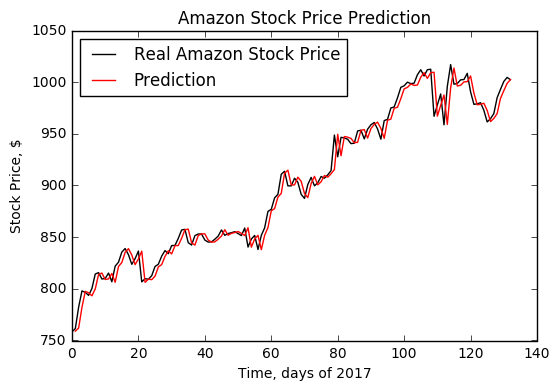

132 132


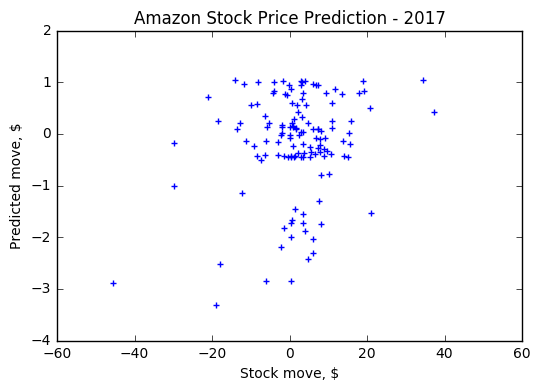

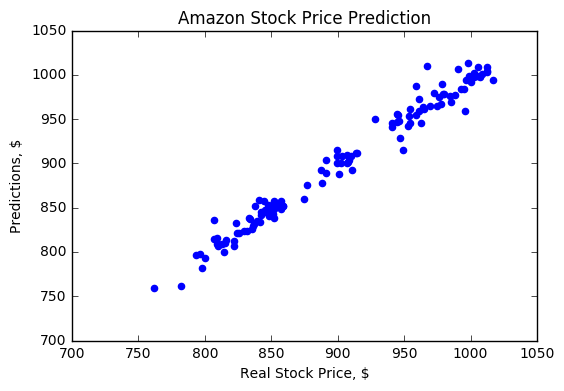

Epoch 1/50
9091/9091 [==============================] - 6s - loss: 0.0362     
Epoch 2/50
9091/9091 [==============================] - 1s - loss: 0.0035     
Epoch 3/50
9091/9091 [==============================] - 1s - loss: 4.3258e-05     
Epoch 4/50
9091/9091 [==============================] - 1s - loss: 3.9171e-05     
Epoch 5/50
9091/9091 [==============================] - 1s - loss: 3.7795e-05     
Epoch 6/50
9091/9091 [==============================] - 1s - loss: 3.6382e-05     
Epoch 7/50
9091/9091 [==============================] - 1s - loss: 3.5408e-05     
Epoch 8/50
9091/9091 [==============================] - 1s - loss: 3.4392e-05     
Epoch 9/50
9091/9091 [==============================] - 1s - loss: 3.3804e-05     
Epoch 10/50
9091/9091 [==============================] - 1s - loss: 3.3144e-05     
Epoch 11/50
9091/9091 [==============================] - 1s - loss: 3.2573e-05     
Epoch 12/50
9091/9091 [==============================] - 1s - loss: 3.2216e-05     
Epoch 13/

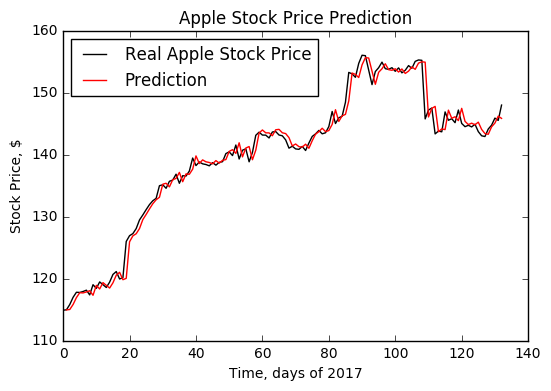

132 132


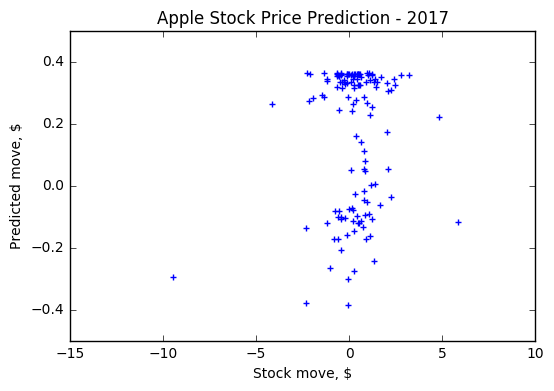

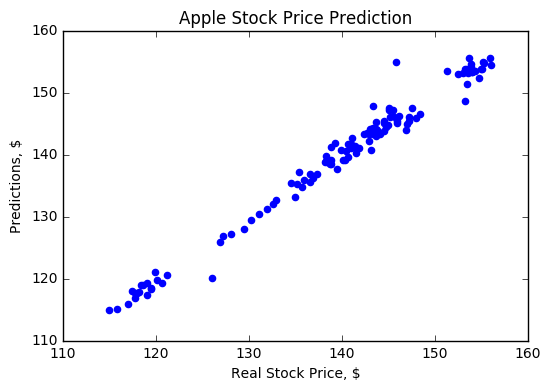

Epoch 1/50
1296/1296 [==============================] - 4s - loss: 0.2501     
Epoch 2/50
1296/1296 [==============================] - 0s - loss: 0.1878     
Epoch 3/50
1296/1296 [==============================] - 0s - loss: 0.1397     
Epoch 4/50
1296/1296 [==============================] - 0s - loss: 0.1005     
Epoch 5/50
1296/1296 [==============================] - 0s - loss: 0.0718     
Epoch 6/50
1296/1296 [==============================] - 0s - loss: 0.0542     
Epoch 7/50
1296/1296 [==============================] - 0s - loss: 0.0452     
Epoch 8/50
1296/1296 [==============================] - 0s - loss: 0.0400     
Epoch 9/50
1296/1296 [==============================] - 0s - loss: 0.0357     
Epoch 10/50
1296/1296 [==============================] - 0s - loss: 0.0312     
Epoch 11/50
1296/1296 [==============================] - 0s - loss: 0.0265     
Epoch 12/50
1296/1296 [==============================] - 0s - loss: 0.0217     
Epoch 13/50
1296/1296 [==========================

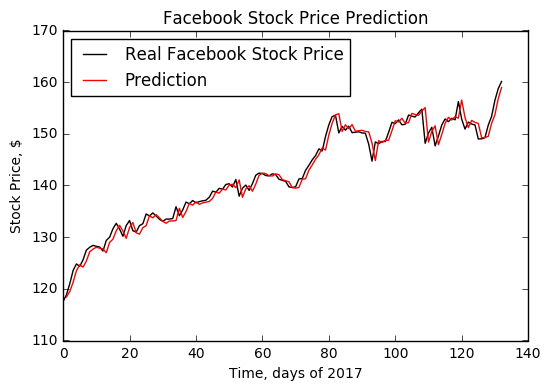

132 132


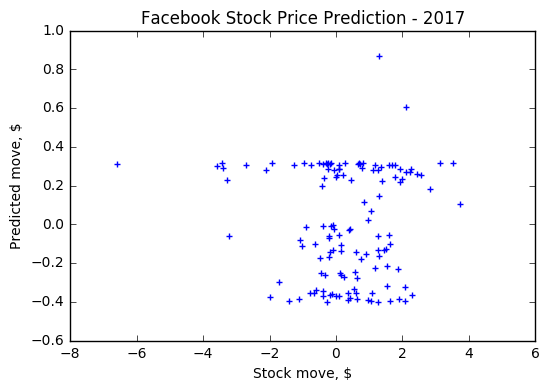

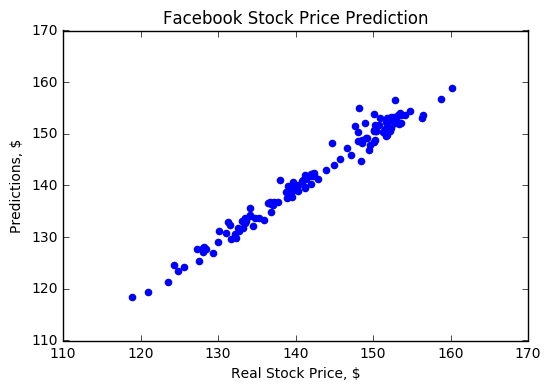

Epoch 1/50
3114/3114 [==============================] - 5s - loss: 0.1367     
Epoch 2/50
3114/3114 [==============================] - 0s - loss: 0.0443     
Epoch 3/50
3114/3114 [==============================] - 0s - loss: 0.0266     
Epoch 4/50
3114/3114 [==============================] - 0s - loss: 0.0186     
Epoch 5/50
3114/3114 [==============================] - 0s - loss: 0.0112     
Epoch 6/50
3114/3114 [==============================] - 0s - loss: 0.0055     
Epoch 7/50
3114/3114 [==============================] - 0s - loss: 0.0021     
Epoch 8/50
3114/3114 [==============================] - 0s - loss: 7.4043e-04     
Epoch 9/50
3114/3114 [==============================] - 0s - loss: 3.5477e-04     
Epoch 10/50
3114/3114 [==============================] - 0s - loss: 2.7838e-04     
Epoch 11/50
3114/3114 [==============================] - 0s - loss: 2.6419e-04     
Epoch 12/50
3114/3114 [==============================] - 0s - loss: 2.5737e-04     
Epoch 13/50
3114/3114 [======

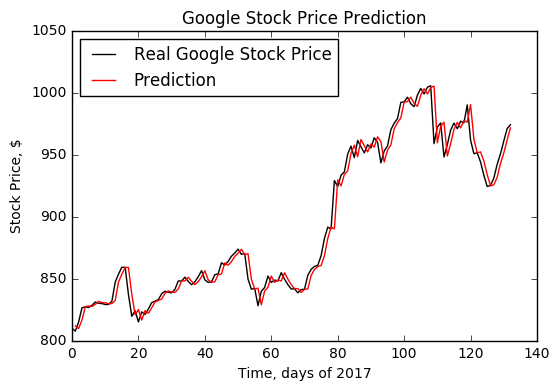

132 132


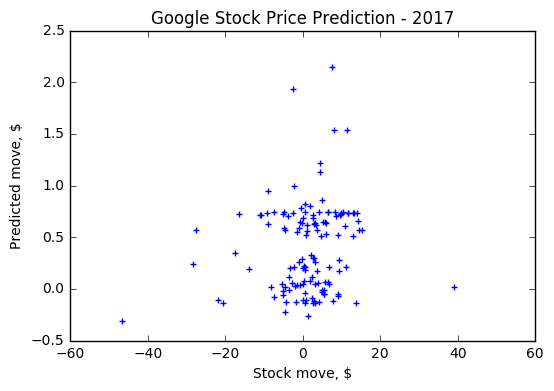

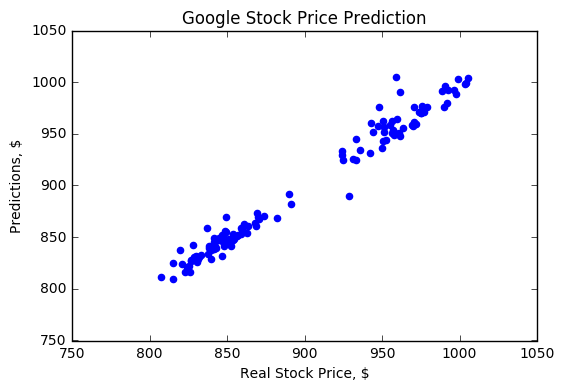

Epoch 1/50
13845/13845 [==============================] - 7s - loss: 0.0463     
Epoch 2/50
13845/13845 [==============================] - 2s - loss: 8.0291e-04     
Epoch 3/50
13845/13845 [==============================] - 2s - loss: 5.4975e-05     
Epoch 4/50
13845/13845 [==============================] - 2s - loss: 4.5705e-05     
Epoch 5/50
13845/13845 [==============================] - 2s - loss: 3.8366e-05     
Epoch 6/50
13845/13845 [==============================] - 2s - loss: 3.3437e-05     
Epoch 7/50
13845/13845 [==============================] - 2s - loss: 3.0661e-05     
Epoch 8/50
13845/13845 [==============================] - 2s - loss: 2.9529e-05     
Epoch 9/50
13845/13845 [==============================] - 2s - loss: 2.9208e-05     
Epoch 10/50
13845/13845 [==============================] - 2s - loss: 2.9269e-05     
Epoch 11/50
13845/13845 [==============================] - 2s - loss: 2.9080e-05     
Epoch 12/50
13845/13845 [==============================] - 2s - los

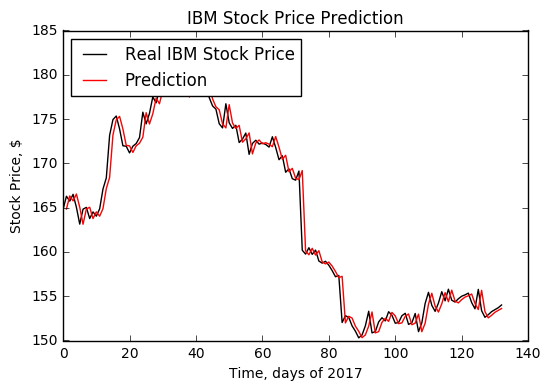

132 132


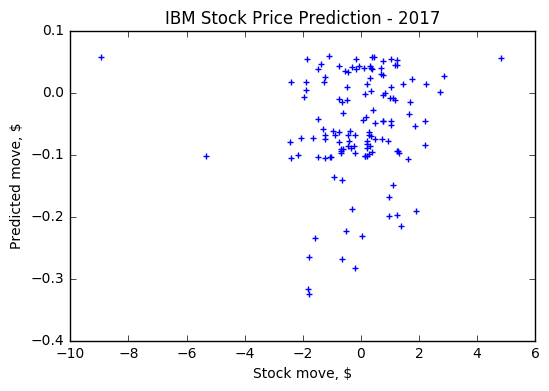

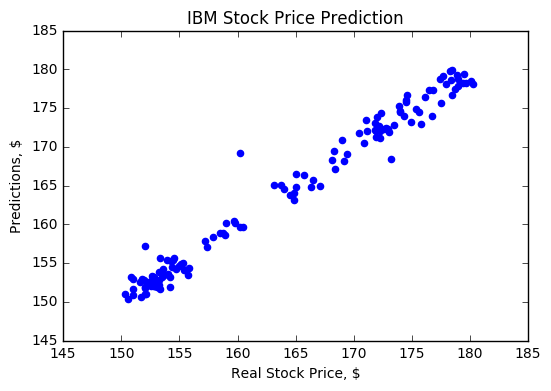

Epoch 1/50
7766/7766 [==============================] - 6s - loss: 0.0461     
Epoch 2/50
7766/7766 [==============================] - 1s - loss: 0.0126     
Epoch 3/50
7766/7766 [==============================] - 1s - loss: 0.0012     
Epoch 4/50
7766/7766 [==============================] - 1s - loss: 1.8774e-04     
Epoch 5/50
7766/7766 [==============================] - 1s - loss: 1.5801e-04     
Epoch 6/50
7766/7766 [==============================] - 1s - loss: 1.3267e-04     
Epoch 7/50
7766/7766 [==============================] - 1s - loss: 1.0866e-04     
Epoch 8/50
7766/7766 [==============================] - 1s - loss: 8.8098e-05     
Epoch 9/50
7766/7766 [==============================] - 1s - loss: 7.1693e-05     
Epoch 10/50
7766/7766 [==============================] - 1s - loss: 5.9675e-05     
Epoch 11/50
7766/7766 [==============================] - 1s - loss: 5.1414e-05     
Epoch 12/50
7766/7766 [==============================] - 1s - loss: 4.6253e-05     
Epoch 13/50
7

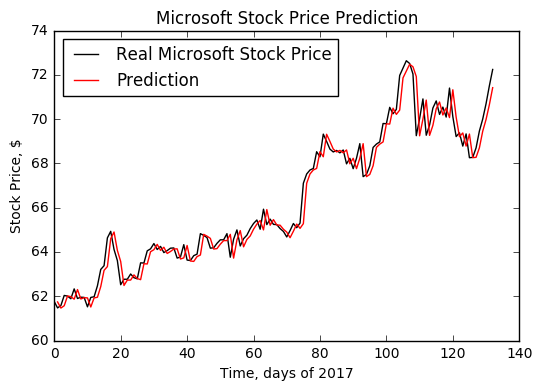

132 132


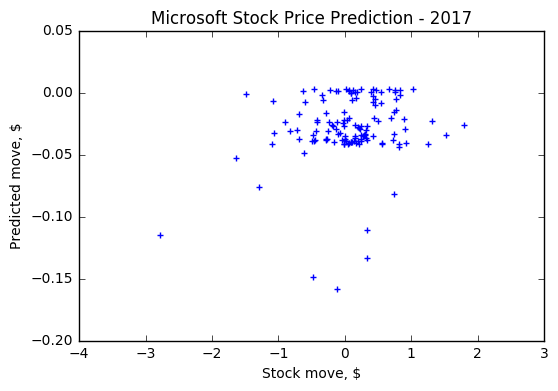

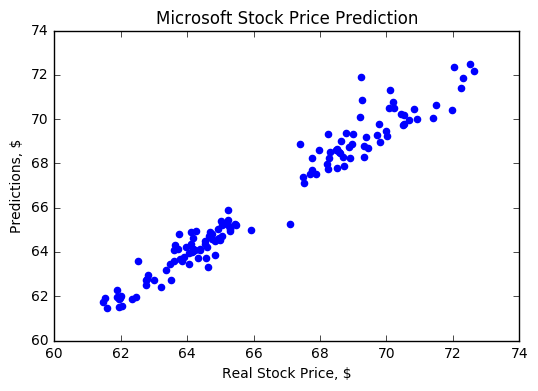

In [135]:
for i in range(len(firms)):
    # Recurrent Neural Network
    # Part 1 - Data Preprocessing

    # Importing the training set
    #training_set = read_data('Google_Stock_Price_Train.csv')
    TRAIN_FILE, TEST_FILE = file_names(firms[i])
    prices_in_dollars, data_norm = read_data(TRAIN_FILE)
    X_train, Y_train = get_train_data(data_norm)
    regressor = get_model(X_train, Y_train)

    # Part 3 - Making the predictions and visualising the results

    # Getting the real stock price of 2017
    real_stock_price, test_data = read_data(TEST_FILE)
    
    # Getting the predicted stock price of 2017
    move = get_move(real_stock_price)
    test_input, y_input = get_train_data(test_data)
    test_output = regressor.predict(test_input)
    predicted_stock_price = sc.inverse_transform(test_output)

    pred_move = predicted_stock_price - real_stock_price[:-1]

    show_predictions(firms[i], real_stock_price, predicted_stock_price)

    show_moves(firms[i], move, pred_move)

    show_corr(firms[i], real_stock_price, predicted_stock_price)

In [127]:
real_price_June = real_stock_price
print(len(real_stock_price))

133


In [75]:
print(len(real_price_June), len(predicted_stock_price))

133 133


132 133


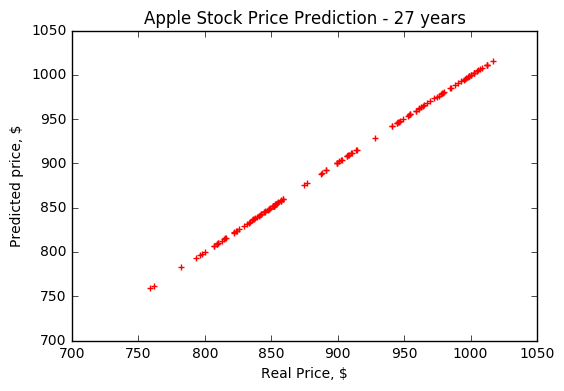

In [76]:
print(len(move), len(pred_move))
# Visualising the results
fig = plt.figure()
#plt.plot(move)
#plt.plot(pred_move)
plt.scatter(real_price_June, predicted_stock_price, color = 'red', marker = '+', label = 'Predicted move')
#plt.scatter(inputs, sc.transform(predicted_tanh_100), color = 'black', marker = '+', label = 'Real Google Stock Price')
#plt.scatter(inputs, sc.transform(predicted_tanh_10), color = 'blue', marker = 'o', label = 'Real Google Stock Price')
#plt.scatter(inputs, sc.transform(predicted_tanh_7), color = 'green', marker = '3', label = 'Real Google Stock Price')
#plt.scatter(inputs, sc.transform(predicted_tanh_5), color = 'magenta', marker = '8', label = 'Real Google Stock Price')
#plt.scatter(inputs, sc.transform(predicted_tanh_3), color = 'cyan', marker = '^', label = 'Real Google Stock Price')
#plt.scatter(inputs, ts[:len(inputs)], color = 'yellow', marker = 'o', label = 'Real Google Stock Price')
plt.title('Apple Stock Price Prediction - 27 years')
plt.xlabel('Real Price, $')
plt.ylabel('Predicted price, $')
#plt.legend(loc='upper left')
plt.show()
fig.savefig('June_prices.png')
#plt.plot(real_price_June, predicted_stock_price)